In [7]:
import numpy as np
np.random.seed(42) # reproducibility

In [8]:
N_TREES = 50000
CELLS = 300
trees = np.random.randint(0,CELLS,(N_TREES,2)) # choose 50000 tree locations (assign fuel to half of cells)
fuel = np.zeros((CELLS,CELLS), dtype=np.uint8) # could be 1000x1000m
fuel[trees[:,0], trees[:,1]] = np.random.randint(0,255,N_TREES)

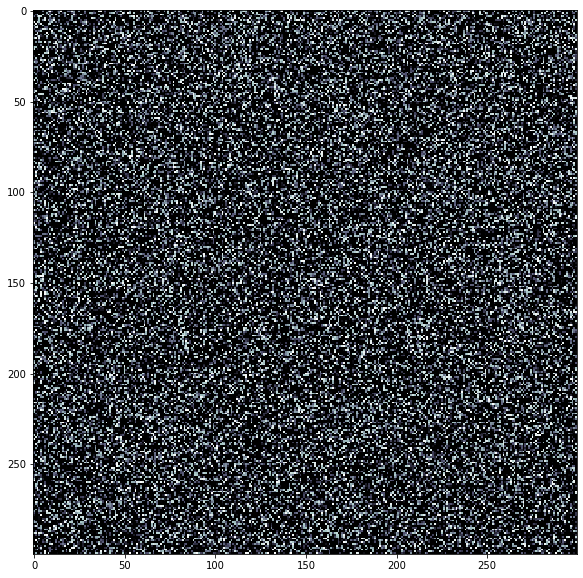

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(fuel, cmap='bone')
plt.show()

In [10]:
state = np.zeros_like(fuel)
def ignite(state):
    state[state.shape[0]//2-1,state.shape[1]//2-1] = 1
    state[state.shape[0]//2-1,state.shape[1]//2] = 1
    state[state.shape[0]//2,state.shape[1]//2-1] = 1
    state[state.shape[0]//2,state.shape[1]//2] = 1
    
ignite(state)

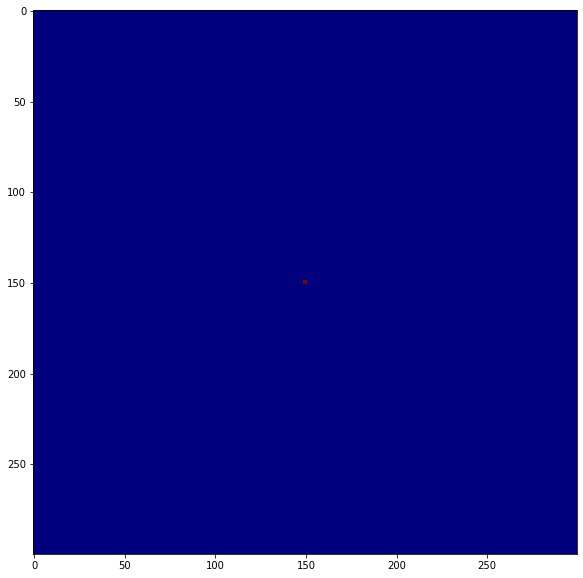

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(state, cmap='jet')
plt.show()

In [13]:
import scipy.signal
kernel = np.array([[1,1,1],[1,0,1],[1,1,1]])

N_STEPS = 200
state = np.zeros_like(fuel)
ignite(state)
states_history = np.zeros((N_STEPS,*state.shape))
for i in range(N_STEPS):
    states_history[i] = state
    count_neighbors_on_fire = scipy.signal.convolve2d(state, kernel, 'same')
    state += (count_neighbors_on_fire * np.random.random(state.shape) > 0.3) * fuel

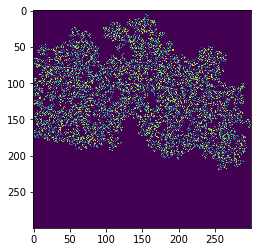

In [14]:
plt.imshow(states_history[-1])

In [ ]:
import skimage.io
for i in range(N_STEPS):
    padded_n = '{0:03d}'.format(i)
    skimage.io.imsave(f'frames/frame{padded_n}.png',states_history[i])

In [ ]:
'{0:03d}'.format(4)

In [ ]:
fig = plt.figure()
for st in states_list:
    plt.imshow(st)

In [ ]:
#convert the frames to a video
#ffmpeg -i frame%03d.png -c:v libx264 -crf 0 -preset veryslow -c:a libmp3lame -b:a 320k output.mp4